In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, ReLU, LeakyReLU          # ReLU >-- ( y: if y>=0: print y else 0 )
                                                        #leakyReLU >-- ( y: if y>=0: print y else y * 𝛼 (alpha) ) 
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.utils.np_utils import to_categorical

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , r2_score, mean_absolute_error

In [4]:
from sklearn.datasets import fetch_california_housing
house_data = fetch_california_housing()
print(house_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
X = house_data.data
y = house_data.target

In [6]:
X = pd.DataFrame(data = X , columns= house_data.feature_names)
X.sample(7)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19468,3.1848,27.0,5.579387,1.061281,1806.0,2.515320,37.68,-120.98
8951,2.1250,39.0,4.096154,0.846154,138.0,2.653846,34.03,-118.37
10707,2.6848,26.0,4.594268,1.095023,888.0,1.339367,33.61,-117.71
5410,6.2583,37.0,4.959502,0.959502,783.0,2.439252,34.02,-118.44
12028,4.0256,28.0,5.967880,1.049251,1684.0,3.605996,33.94,-117.49
10349,7.5488,25.0,7.550403,1.052419,1648.0,3.322581,33.60,-117.66
14622,3.7381,34.0,4.883495,0.947573,1594.0,3.095146,32.78,-117.16


In [7]:
# !pip install sweetviz

In [8]:
X['Price'] = y    # add new columns where the data belongs to y ( target)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
import sweetviz

In [10]:
report = sweetviz.analyze(X, target_feat='Price')

                                             |                                             | [  0%]   00:00 ->…

In [11]:
report.show_html('California_Housing_Report.html')

Report California_Housing_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
X.drop(['Price'],axis = 1, inplace = True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2 , random_state= 222)

Standard Scalling ( X_train, X_test)

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [28]:
model = Sequential()

# input Layer
model.add(Dense(input_dim = 8, units = 16 , activation = LeakyReLU()))

# hidden Layer
model.add(Dense(units = 12 , activation = LeakyReLU()))
model.add(Dense(units = 8 , activation = LeakyReLU()))

# output Layer
model.add(Dense(units = 1 , activation = ReLU()))   # RelU used for regression
                                                    # LeakyReLU for classification
model.compile( loss = 'mae', metrics=['mae','mse'], optimizer ='adam')

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                144       
                                                                 
 dense_13 (Dense)            (None, 12)                204       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [30]:
es = EarlyStopping(monitor='val_mae', patience = 10)
checkpoint = ModelCheckpoint(filepath= 'checkpoint.h5',save_best_only= True, save_weights_only= False)

In [31]:
history = model.fit(X_train,y_train, epochs= 1000, validation_split= 0.1, callbacks= [es,checkpoint])

Epoch 1/1000
465/465 [==============================] - 2s 2ms/step - loss: 0.7904 - mae: 0.7904 - mse: 1.3177 - val_loss: 0.5392 - val_mae: 0.5392 - val_mse: 0.6532
Epoch 2/1000
465/465 [==============================] - 1s 1ms/step - loss: 0.4850 - mae: 0.4850 - mse: 0.5110 - val_loss: 0.4708 - val_mae: 0.4708 - val_mse: 0.5054
Epoch 3/1000
465/465 [==============================] - 1s 1ms/step - loss: 0.4547 - mae: 0.4547 - mse: 0.4523 - val_loss: 0.4577 - val_mae: 0.4577 - val_mse: 0.4779
Epoch 4/1000
465/465 [==============================] - 1s 1ms/step - loss: 0.4436 - mae: 0.4436 - mse: 0.4274 - val_loss: 0.4488 - val_mae: 0.4488 - val_mse: 0.4619
Epoch 5/1000
465/465 [==============================] - 1s 1ms/step - loss: 0.4383 - mae: 0.4383 - mse: 0.4201 - val_loss: 0.4409 - val_mae: 0.4409 - val_mse: 0.4340
Epoch 6/1000
465/465 [==============================] - 1s 2ms/step - loss: 0.4312 - mae: 0.4312 - mse: 0.4088 - val_loss: 0.4340 - val_mae: 0.4340 - val_mse: 0.4322
Epoc

465/465 [==============================] - 1s 1ms/step - loss: 0.3672 - mae: 0.3672 - mse: 0.3122 - val_loss: 0.3736 - val_mae: 0.3736 - val_mse: 0.3320
Epoch 51/1000
465/465 [==============================] - 1s 1ms/step - loss: 0.3679 - mae: 0.3679 - mse: 0.3115 - val_loss: 0.3767 - val_mae: 0.3767 - val_mse: 0.3364
Epoch 52/1000
465/465 [==============================] - 1s 1ms/step - loss: 0.3671 - mae: 0.3671 - mse: 0.3117 - val_loss: 0.3740 - val_mae: 0.3740 - val_mse: 0.3341
Epoch 53/1000
465/465 [==============================] - 1s 1ms/step - loss: 0.3699 - mae: 0.3699 - mse: 0.4257 - val_loss: 0.3818 - val_mae: 0.3818 - val_mse: 0.3307
Epoch 54/1000
465/465 [==============================] - 1s 1ms/step - loss: 0.3666 - mae: 0.3666 - mse: 0.3114 - val_loss: 0.3736 - val_mae: 0.3736 - val_mse: 0.3323
Epoch 55/1000
465/465 [==============================] - 1s 1ms/step - loss: 0.3641 - mae: 0.3641 - mse: 0.3083 - val_loss: 0.3859 - val_mae: 0.3859 - val_mse: 0.3578
Epoch 56/100

465/465 [==============================] - 1s 1ms/step - loss: 0.3513 - mae: 0.3513 - mse: 0.2899 - val_loss: 0.3660 - val_mae: 0.3660 - val_mse: 0.3336
Epoch 100/1000
465/465 [==============================] - 1s 1ms/step - loss: 0.3488 - mae: 0.3488 - mse: 0.2885 - val_loss: 0.3624 - val_mae: 0.3624 - val_mse: 0.3130
Epoch 101/1000
465/465 [==============================] - 1s 1ms/step - loss: 0.3503 - mae: 0.3503 - mse: 0.2904 - val_loss: 0.3694 - val_mae: 0.3694 - val_mse: 0.3286


In [33]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

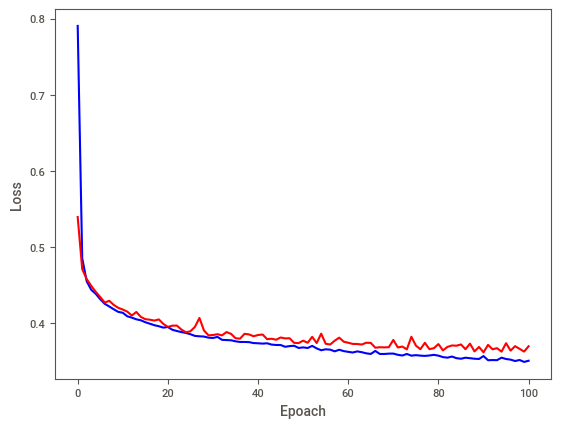

In [34]:
plt.xlabel('Epoach')
plt.ylabel('Loss')
plt.plot(history.history['loss'],c ='b')
plt.plot(history.history['val_loss'],c ='r')
plt.show()